Neste notebook será feita uma breve leitura, processamento e análise dos dados da base de dados IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados IMBD.

In [1]:
import pandas as pd

df = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
df = df.drop_duplicates()
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Primeiramente, vamos conhecer todas as colunas da base de dados:

In [2]:
df.columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

A feature 'num_critic_for_review' informa a quantidade de críticas em cada filme, podemos retirar boas informações a partir dela.

In [3]:
df["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 4998, dtype: float64

In [4]:
df["num_critic_for_reviews"].describe()

count    4949.000000
mean      139.890079
std       121.477586
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Vamos plotar um histograma para visualizar e avaliar melhor estes dados:

<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='Count'>

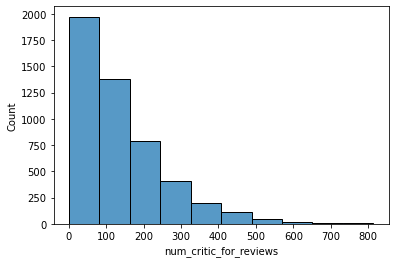

In [5]:
import seaborn as sns

sns.histplot(data=df, x="num_critic_for_reviews", bins=10)

É possível observar um número bem reduzido de filmes com mais de 500 críticas. Nota-se que poucos filmes tem muitas críticas e muitos filmes possuem um número pequeno de críticas. Uma hipótese é que filmes populares tendem a ter um número maior de avaliações e a quantidade de filmes populares não é tão grande, enquanto que filmes não tão populares não são recorrentemente avaliados, vamos tentar validar está hipotese?

Existe uma coluna nesse dataset que mostra a quantidade de likes que o filme recebeu no facebook ("movie_facebook_likes"), podendo ser um bom medidor de popularidade do filme, vamos usar esta coluna para tentar validar está hipótese:

Primeiramente, vamos ver a popularidade dos filmes com um número de críticas maior que 500:

In [6]:
df[df["num_critic_for_reviews"] > 500]["movie_facebook_likes"].describe()

count        81.000000
mean      94395.061728
std       53632.238209
min       19000.000000
25%       56000.000000
50%       82000.000000
75%      123000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

Vemos que existem apenas 81 filmes com mais de 500 críticas, tendo estes filmes, em média, 94395 curtidas no facebook.

Vamos, agora, a popularidade dos filmes com um número de críticas menor ou igual a 500:

In [7]:
df[df["num_critic_for_reviews"] <= 500]["movie_facebook_likes"].describe()

count      4868.000000
mean       6115.892153
std       14375.556221
min           0.000000
25%           0.000000
50%         147.500000
75%        2000.000000
max      165000.000000
Name: movie_facebook_likes, dtype: float64

Observamos que a média de curtidas no facebook para estes filmes é de 6145 curtidas. 

Logo, os filmes com mais de 500 críticas tem uma média de curtidas no facebook 15 maior que a média de curtidas no facebook para filmes com menor de 500 críticas, confirmando assim a nossa hipótese.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross (faturamento):

<AxesSubplot:xlabel='gross', ylabel='Count'>

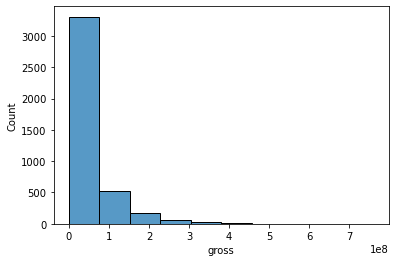

In [8]:
sns.histplot(data=df, x="gross", bins=10)

Aqui, obseramos a mesma tendência vista no número de críticas. Poucos filmes possuem um alto faturamento e muitos filmes possuem um baixo faturamento.

Só por curiosidade, vamos conhecer quais são estes filmes que obtiveram um faturamento astronômico.

In [9]:
df.sort_values("gross", ascending=False)[["movie_title", "gross"]].head(10)

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
17,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0
582,Shrek 2,436471036.0


Vamos fazer uma investigação da relação entre o faturamento e orçamento dos filmes.

A seguir, um plot de um gráfico que mostra a relação entre faturamento e orçamento:

<AxesSubplot:xlabel='budget', ylabel='gross'>

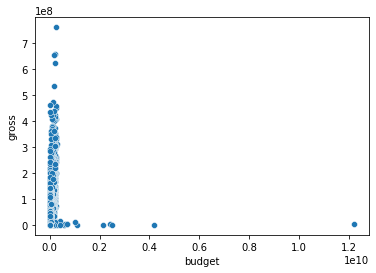

In [10]:
gross_budget = df[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = gross_budget)

Com o gráfico, observamos um filme com um budget (orçamento) extremamente alto, mas o gross (faturamento) está bem baixo. Vamos ver que filme é esse, e analisar se há algo de errado com estes dados ou não. 

In [11]:
df.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Observando os dados dos 5 filmes com maiores orçamentos, observamos que 4 deles são de origem asiáticas. Mas o mais curioso é quando analisamos a coluna que usamos anteriormente para mensurar a popularidade do filme, estes 5 filmes possuem uma quantidade muito baixa de curtidas no facebook, e também não possuem muitas críticas. Existem duas hipóteses neste caso, ou estes filmes foram casos de fracassos, havendo um orçamento astronomico com uma popularidade e faturamento pífio, ou então, os dados estão inválidos, talvez devido a um erro de conversão de moedas ou algo assim.

Neste caso, vamos focar nossa análise de orçamento x faturamento, apenas em um único país para descartarmos a possibilidade de erros de conversão de moedas. Vamos ver qual país possui um maior número de filmes nesta base de dados:

In [12]:
df["country"].value_counts()

USA                   3773
UK                     443
France                 154
Canada                 124
Germany                 96
                      ... 
Kenya                    1
Aruba                    1
Chile                    1
Dominican Republic       1
Official site            1
Name: country, Length: 65, dtype: int64

In [13]:
df["country"].value_counts(normalize=True)

USA                   0.755658
UK                    0.088724
France                0.030843
Canada                0.024835
Germany               0.019227
                        ...   
Kenya                 0.000200
Aruba                 0.000200
Chile                 0.000200
Dominican Republic    0.000200
Official site         0.000200
Name: country, Length: 65, dtype: float64

Filmes de origem de USA correspondem a 75% deste conjunto de dados, logo vamos focar nossa análise neste subconjunto de filmes.

Vamos então, novamente, plotar o gráfico de orçamento x faturamento, desta vez filtrando o nosso dataset pelos filmes produzidos em USA:

<AxesSubplot:xlabel='budget', ylabel='gross'>

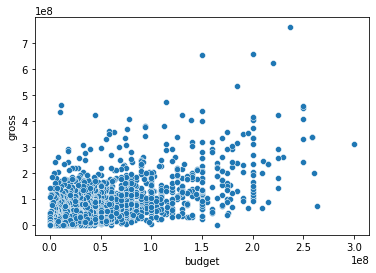

In [14]:
usa_df = df[df["country"] == "USA"]

gross_budget_usa = usa_df[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = gross_budget_usa)

Agora sim, não temos nenhum dado discrepante e podemos melhor analisar e tirar informações desse gráfico.

 Parece haver uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento. O que de certa forma é de se esperar na maioria dos casos, se não, não seria vantajoso produzir filmes, pois nunca haveria lucro.

Por falar em lucro, não temos uma coluna no dataset que informe o lucro do filme. Porém, sabemos o orçamento e o faturamento, logo podemos obter o lucro de cada filme. Vamos fazer isso criando uma nova coluna no conjunto de dados sendo o resultado da subtração do orçamento no faturamento.

In [15]:
usa_df['profit'] = usa_df['gross'] - usa_df['budget']

usa_df['profit'].describe()

<ipython-input-15-24176da9239c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_df['profit'] = usa_df['gross'] - usa_df['budget']


count    3.047000e+03
mean     1.718710e+07
std      5.516740e+07
min     -1.906413e+08
25%     -8.747974e+06
50%      3.257792e+06
75%      3.041335e+07
max      5.235058e+08
Name: profit, dtype: float64

Vamos agora, analisar o lucro obtido pelos filmes em função do ano em que eles foram lançados:

<AxesSubplot:xlabel='title_year', ylabel='profit'>

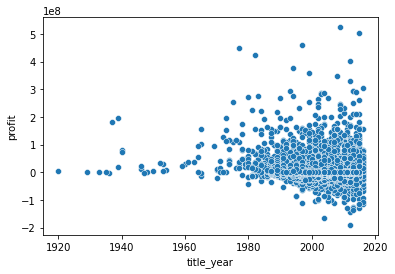

In [16]:
year_profit = usa_df.query("budget >0 | gross > 0")[["title_year", "profit"]].dropna()

sns.scatterplot(x="title_year", y="profit", data = year_profit)

Constatamos que o lucro na indústria cinematográfica tem aumentado ao passar dos anos, o que é de se esperar, pois a cada ano que passa mais recursos tem sido utilizados para a produção de filmes. 

Em contrapartida, parece que quando há prejuizo, a chance dele ser alto tem sido maior a cada ano. Podemos pensar em duas hipóteses para isso: de fato o filme gerou um grande prejuízo ou o faturamento do filme ainda não conseguiu superar o orçamento, porém o faturamento ainda está aumentado, o que ocorre no caso de filmes recém-lançados. 

Vamos plotar um gráfico que mostra a média do lucro dos filmes em função do ano para tentar responder a essa questão:

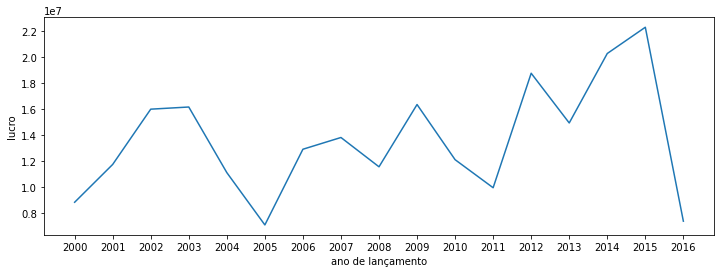

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
lucro_por_ano = usa_df.query("title_year >= 2000").groupby("title_year").mean()["profit"]
lucro_por_ano.plot(xticks=lucro_por_ano.keys())
plt.ylabel("lucro")
plt.xlabel("ano de lançamento")
plt.show()

Como pode ser visto, de 2015 para 2016 houve uma grande queda no lucro dos filmes. Será que realmente aconteceu essa queda de lucro no ano de 2016?

In [18]:
usa_df['title_year'].value_counts().sort_index(ascending=False).head(10)

2016.0     75
2015.0    168
2014.0    183
2013.0    171
2012.0    170
2011.0    164
2010.0    166
2009.0    183
2008.0    163
2007.0    150
Name: title_year, dtype: int64

Respondendo a pergunta anterior... Pode-se observar, que a quantidade de filmes lançados em 2016 é bem pequena em relação aos anos anteriores. O que leva a teoria de que a base de dados pode ter sido coletada no ano de 2016 ou algo bem proximo disso, influenciando, assim, no lucro final. Aumentando os indícios de que o grande lucro negativo pode ser devido ao fato de os filmes recém-lançados ainda estão recuperando o valor investido.

Outras análises podem ser feitas em cima dessa base de dados, como por exemplo explorar as features imbd_score, duration, color entre outras, podendo enriquecer ainda mais o conhecimento a cerca do domínio.